<a href="https://colab.research.google.com/github/AARSHGHEWDE/ML/blob/master/J067_EXP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!wget -O 2011gcn.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
!wget -O tx2011partvertices_new.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
!wget -O tx2011partvertices.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices.csv
 
train1 = pd.read_csv('2011gcn.csv')
train2 = pd.read_csv('tx2011partvertices_new.csv')
train3 = pd.read_csv('tx2011partvertices.csv')

--2020-08-28 05:54:26--  https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12563086 (12M) [text/plain]
Saving to: ‘2011gcn.csv’

2011gcn.csv         100%[===================>]  11.98M  --.-KB/s    in 0.06s   

2020-08-28 05:54:27 (207 MB/s) - ‘2011gcn.csv’ saved [12563086/12563086]

--2020-08-28 05:54:27--  https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12501458 (12M) [text/plain]


In [ ]:
train1.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,1,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,2,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,3,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,4,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05


In [ ]:
train2.head(5)

,Unnamed: 0,txsize,txvirtualsize,txinputs_count,txoutputs_count,txinput_val,txoutput_val,txfee,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received,Min_sent,Max_sent,Avg_sent,Total_sent,Stdev_sent,Var_sent
0,1,7369,7369,5,190,215000000.0,214600000.0,400000,0.0005,1.0000,0.011295,2.1460,0.081163,0.006587,0.0005,1.6700,0.4300,2.1500,0.703445,0.494835
1,2,293,293,1,3,4400000.0,4350000.0,50000,0.0010,0.0415,0.014500,0.0435,0.023383,0.000547,0.0440,0.0440,0.0440,0.0440,0.000000,0.000000
2,3,11139,11139,1,322,125000000.0,124400000.0,600000,0.0010,0.4460,0.003863,1.2440,0.024941,0.000622,1.2500,1.2500,1.2500,1.2500,0.000000,0.000000
3,4,495,495,1,9,27450000.0,27400000.0,50000,0.0010,0.2660,0.030444,0.2740,0.088333,0.007803,0.2745,0.2745,0.2745,0.2745,0.000000,0.000000
4,5,462,462,1,8,3000000.0,2950000.0,50000,0.0010,0.0225,0.003687,0.0295,0.007601,0.000058,0.0300,0.0300,0.0300,0.0300,0.000000,0.000000


In [ ]:
train3.head(5)

,Unnamed: 0,label
0,1,unclassified
1,2,donations
2,3,unclassified
3,4,donations
4,5,donations


In [ ]:
train3['label'].unique()

array(['unclassified', 'donations', 'exchange', 'mixer', 'paymentgateway',
       'wallets'], dtype=object)

In [ ]:
train1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  96498 non-null  int64  
 1   0           96498 non-null  float64
 2   1           96498 non-null  float64
 3   2           96498 non-null  float64
 4   3           96498 non-null  float64
 5   4           96498 non-null  float64
 6   5           96498 non-null  float64
 7   6           96498 non-null  float64
 8   7           96498 non-null  float64
 9   8           96498 non-null  float64
 10  9           96498 non-null  float64
 11  10          96498 non-null  float64
 12  11          96498 non-null  float64
 13  12          96498 non-null  float64
 14  13          96498 non-null  float64
 15  14          96498 non-null  float64
 16  15          96498 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 12.5 MB


In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       96498 non-null  int64  
 1   txsize           96498 non-null  int64  
 2   txvirtualsize    96498 non-null  int64  
 3   txinputs_count   96498 non-null  int64  
 4   txoutputs_count  96498 non-null  int64  
 5   txinput_val      96498 non-null  float64
 6   txoutput_val     96498 non-null  float64
 7   txfee            96498 non-null  int64  
 8   Min_received     96498 non-null  float64
 9   Max_received     96498 non-null  float64
 10  Avg_received     96498 non-null  float64
 11  Total_received   96498 non-null  float64
 12  Stdev_received   96498 non-null  float64
 13  Var_received     96498 non-null  float64
 14  Min_sent         96498 non-null  float64
 15  Max_sent         96498 non-null  float64
 16  Avg_sent         96498 non-null  float64
 17  Total_sent  

In [ ]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96498 entries, 0 to 96497
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  96498 non-null  int64 
 1   label       96498 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
results = pd.merge(train3, train1, on='Unnamed: 0', how='inner')

# split data into X and y
X = results.iloc[:,2:18]
Y1 = pd.get_dummies(results['label'])

In [ ]:
Y1

,donations,exchange,mixer,paymentgateway,unclassified,wallets
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
96492,1,0,0,0,0,0
96493,1,0,0,0,0,0
96494,1,0,0,0,0,0
96495,1,0,0,0,0,0


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
1,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
2,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
3,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05
4,0.0,9.194186e+07,0.0,0.0,1.013007e+08,0.0,9.967545e+07,0.0,0.0,7.925459e+05,7.624475e+07,1.194678e+08,0.0,0.0,5.104336e+07,1.588764e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96492,0.0,1.076483e+09,0.0,0.0,1.186269e+09,0.0,1.167082e+09,0.0,0.0,9.130316e+06,8.922416e+08,1.398730e+09,0.0,0.0,5.976924e+08,1.860175e+09
96493,0.0,3.046724e+09,0.0,0.0,3.357382e+09,0.0,3.303128e+09,0.0,0.0,2.588797e+07,2.525414e+09,3.958776e+09,0.0,0.0,1.691605e+09,5.264773e+09
96494,0.0,7.927045e+08,0.0,0.0,8.734944e+08,0.0,8.594076e+08,0.0,0.0,6.762438e+06,6.571497e+08,1.030010e+09,0.0,0.0,4.401156e+08,1.369801e+09
96495,0.0,1.702268e+09,0.0,0.0,1.875876e+09,0.0,1.845536e+09,0.0,0.0,1.443773e+07,1.410918e+09,2.211843e+09,0.0,0.0,9.451462e+08,2.941539e+09


In [ ]:
Y1

,donations,exchange,mixer,paymentgateway,unclassified,wallets
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
96492,1,0,0,0,0,0
96493,1,0,0,0,0,0
96494,1,0,0,0,0,0
96495,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size= 0.2, random_state=seed)

In [ ]:
print('X_train shape:',X_train.shape)
print('Y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('Y_test shape:',y_test.shape)

X_train shape: (77197, 16)
Y_train shape: (77197, 6)
X_test shape: (19300, 16)
Y_test shape: (19300, 6)


In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
48328,0.0,5.822672e+08,0.0,0.0,6.416504e+08,0.0,6.312722e+08,0.0,0.0,4.938268e+06,4.826108e+08,7.565698e+08,0.0,0.0,3.232908e+08,1.006164e+09
76849,0.0,4.263686e+08,0.0,0.0,4.698524e+08,0.0,4.622529e+08,0.0,0.0,3.615909e+06,3.533940e+08,5.540024e+08,0.0,0.0,2.367319e+08,7.367698e+08
17128,0.0,1.326298e+05,0.0,0.0,1.406457e+05,0.0,1.424770e+05,0.0,0.0,5.065047e+03,1.218174e+05,1.731530e+05,0.0,0.0,7.203933e+04,2.290891e+05
78662,0.0,2.298266e+08,0.0,0.0,2.532222e+08,0.0,2.491591e+08,0.0,0.0,1.980292e+06,1.905848e+08,2.986317e+08,0.0,0.0,1.275936e+08,3.971421e+08
62778,0.0,1.554714e+07,0.0,0.0,1.712722e+07,0.0,1.685431e+07,0.0,0.0,1.358015e+05,1.289812e+07,2.020204e+07,0.0,0.0,8.630597e+06,2.686555e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,0.0,3.416365e+06,0.0,0.0,3.761028e+06,0.0,3.702991e+06,0.0,0.0,3.166095e+04,2.839768e+06,4.439632e+06,0.0,0.0,1.895765e+06,5.903459e+06
10742,0.0,1.437090e+09,0.0,0.0,1.583420e+09,0.0,1.557985e+09,0.0,0.0,1.235379e+07,1.191624e+09,1.867315e+09,0.0,0.0,7.978467e+08,2.483302e+09
49689,2674226.5,2.088330e+08,0.0,0.0,2.296851e+08,0.0,2.147859e+08,0.0,0.0,0.000000e+00,1.720188e+08,2.772997e+08,0.0,0.0,1.157638e+08,3.588498e+08
58564,0.0,5.512640e+06,0.0,0.0,6.069342e+06,0.0,5.975279e+06,0.0,0.0,5.069499e+04,4.581034e+06,7.163681e+06,0.0,0.0,3.059167e+06,9.525808e+06


In [ ]:
X_train = X_train.drop(['0'], axis=1)

In [ ]:
X_test = X_test.drop(['0'], axis=1)

In [ ]:
X_train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
48328,5.822672e+08,0.0,0.0,6.416504e+08,0.0,6.312722e+08,0.0,0.0,4.938268e+06,4.826108e+08,7.565698e+08,0.0,0.0,3.232908e+08,1.006164e+09
76849,4.263686e+08,0.0,0.0,4.698524e+08,0.0,4.622529e+08,0.0,0.0,3.615909e+06,3.533940e+08,5.540024e+08,0.0,0.0,2.367319e+08,7.367698e+08
17128,1.326298e+05,0.0,0.0,1.406457e+05,0.0,1.424770e+05,0.0,0.0,5.065047e+03,1.218174e+05,1.731530e+05,0.0,0.0,7.203933e+04,2.290891e+05
78662,2.298266e+08,0.0,0.0,2.532222e+08,0.0,2.491591e+08,0.0,0.0,1.980292e+06,1.905848e+08,2.986317e+08,0.0,0.0,1.275936e+08,3.971421e+08
62778,1.554714e+07,0.0,0.0,1.712722e+07,0.0,1.685431e+07,0.0,0.0,1.358015e+05,1.289812e+07,2.020204e+07,0.0,0.0,8.630597e+06,2.686555e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,3.416365e+06,0.0,0.0,3.761028e+06,0.0,3.702991e+06,0.0,0.0,3.166095e+04,2.839768e+06,4.439632e+06,0.0,0.0,1.895765e+06,5.903459e+06
10742,1.437090e+09,0.0,0.0,1.583420e+09,0.0,1.557985e+09,0.0,0.0,1.235379e+07,1.191624e+09,1.867315e+09,0.0,0.0,7.978467e+08,2.483302e+09
49689,2.088330e+08,0.0,0.0,2.296851e+08,0.0,2.147859e+08,0.0,0.0,0.000000e+00,1.720188e+08,2.772997e+08,0.0,0.0,1.157638e+08,3.588498e+08
58564,5.512640e+06,0.0,0.0,6.069342e+06,0.0,5.975279e+06,0.0,0.0,5.069499e+04,4.581034e+06,7.163681e+06,0.0,0.0,3.059167e+06,9.525808e+06


In [ ]:
import keras
from keras import models
from keras import layers

In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(216, activation= 'tanh', input_dim=(15)))
nn.add(layers.Dense(36, activation= 'relu'))
nn.add(layers.Dense(6, activation= 'softmax'))

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 216)               3456      
_________________________________________________________________
dense_1 (Dense)              (None, 36)                7812      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 222       
Total params: 11,490
Trainable params: 11,490
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(optimizer= 'sgd', loss= ['categorical_crossentropy'], metrics= 'accuracy')

In [ ]:
hist = nn.fit(x = X_train, y= y_train, epochs = 128, validation_split= 0.25)

Epoch 1/128
1810/1810 [==============================] - 5s 3ms/step - loss: 0.5660 - accuracy: 0.8589 - val_loss: 0.5697 - val_accuracy: 0.8569
Epoch 2/128
1810/1810 [==============================] - 5s 3ms/step - loss: 0.5656 - accuracy: 0.8593 - val_loss: 0.5692 - val_accuracy: 0.8574
Epoch 3/128
1810/1810 [==============================] - 5s 3ms/step - loss: 0.5656 - accuracy: 0.8591 - val_loss: 0.5691 - val_accuracy: 0.8569
Epoch 4/128
1810/1810 [==============================] - 5s 3ms/step - loss: 0.5652 - accuracy: 0.8594 - val_loss: 0.5724 - val_accuracy: 0.8574
Epoch 5/128
1810/1810 [==============================] - 5s 3ms/step - loss: 0.5651 - accuracy: 0.8597 - val_loss: 0.5668 - val_accuracy: 0.8575
Epoch 6/128
1810/1810 [==============================] - 5s 3ms/step - loss: 0.5652 - accuracy: 0.8595 - val_loss: 0.5687 - val_accuracy: 0.8574
Epoch 7/128
1810/1810 [==============================] - 5s 3ms/step - loss: 0.5649 - accuracy: 0.8597 - val_loss: 0.5675 - val_ac

604/604 [==============================] - 1s 2ms/step - loss: 0.5628 - accuracy: 0.8609


[0.5627692937850952, 0.8609326481819153]

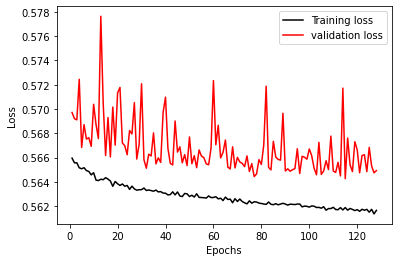

In [ ]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,129)

plt.plot(epochs, loss_train, 'k', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

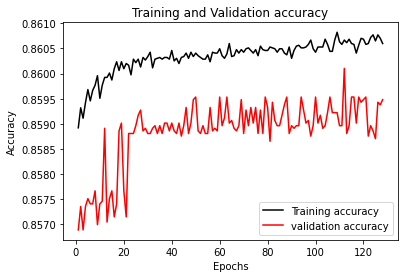

In [ ]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']

epochs = range(1,129)

plt.plot(epochs, loss_train, 'k', label='Training accuracy')
plt.plot(epochs, loss_val, 'r', label='validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
eva_loss, eva_accu = nn.evaluate(x= X_test, y= y_test)

604/604 [==============================] - 1s 2ms/step - loss: 0.5628 - accuracy: 0.8609


In [ ]:
print('Test_accuracy: ',eva_accu)
print('Test_loss: ',eva_loss)

Test_accuracy:  0.8609326481819153
Test_loss:  0.5627692937850952
